In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
# data processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
# ml model and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
file = "./files/house_prediction/"
train = pd.read_csv(file + "train.csv")
test = pd.read_csv(file + "test.csv")
submission = pd.read_csv(file + 'sample_submission.csv')

In [8]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
#Data Inspection

In [10]:
def table_info(df):
    def classified(x):
        if x == 'int64':
            return 'int'
        elif x == 'object':
            return 'str'
        else:
            return 'float'
    df_col = df.columns # get column name
    new_df = df.dtypes # get datatype
    total_row = df.shape[0] # get total row
    new_df.index.name = 'Columns'
    
    new_df = new_df.to_frame(name='Pandas_dtype') # create new dataframe from the pandas.dtype dataframe
    new_df['Python_type'] = new_df['Pandas_dtype'].apply(classified) # add python type
    new_df["Total_Unique"] = df.nunique()
    new_df['Missing_Value'] = df.isnull().sum()  # add missing value col
    new_df['% Missing_Values'] = round((new_df['Missing_Value'] / total_row) * 100,2) # add % missing val
    
    
    print('------------ DATA SUMMARY ----------')
    print(f'\nTotal Rows   : {total_row}')
    print(f'Total Columns: {df.shape[1]}')
    
    val = df.duplicated().value_counts()
    print(f'\nTotal Duplicates: {len(df) - val[0]} \n')
    print('------------------------------------')
    print()
        
    
    return new_df

In [11]:
table_info(train)

------------ DATA SUMMARY ----------

Total Rows   : 1460
Total Columns: 81

Total Duplicates: 0 

------------------------------------



C:\Users\sadhi\AppData\Local\Temp\ipykernel_17688\2080951542.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'\nTotal Duplicates: {len(df) - val[0]} \n')


Pandas_dtype Python_type  Total_Unique  Missing_Value  \
Columns                                                               
Id                   int64         int          1460              0   
MSSubClass           int64         int            15              0   
MSZoning            object         str             5              0   
LotFrontage        float64       float           110            259   
LotArea              int64         int          1073              0   
...                    ...         ...           ...            ...   
MoSold               int64         int            12              0   
YrSold               int64         int             5              0   
SaleType            object         str             9              0   
SaleCondition       object         str             6              0   
SalePrice            int64         int           663              0   

               % Missing_Values  
Columns                          
Id                         0.00  
MSSubClass                 0.00  
MSZoning                   0.00  
LotFrontage               17.74  
LotArea                    0.00  
...                         ...  
MoSold                     0.00  
YrSold                     0.00  
SaleType                   0.00  
SaleCondition              0.00  
SalePrice                  0.00  

[81 rows x 5 columns]

In [14]:
#Data Cleaning

In [16]:
# Get columns with missing values
column_missing = train.columns[train.isna().any()].tolist()

# Loop through each missing column and fill missing values
for column in column_missing:
    if column == 'Electrical':
        train[column] = train[column].fillna(train[column].mode()[0])
    elif train[column].dtype == 'object':
        train[column] = train[column].fillna('Not Available')
    else:
        train[column] = train[column].fillna(0)

# Recheck if the missing values have been fixed
table_info(train)


------------ DATA SUMMARY ----------

Total Rows   : 1460
Total Columns: 81

Total Duplicates: 0 

------------------------------------



C:\Users\sadhi\AppData\Local\Temp\ipykernel_17688\2080951542.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'\nTotal Duplicates: {len(df) - val[0]} \n')


Pandas_dtype Python_type  Total_Unique  Missing_Value  \
Columns                                                               
Id                   int64         int          1460              0   
MSSubClass           int64         int            15              0   
MSZoning            object         str             5              0   
LotFrontage        float64       float           111              0   
LotArea              int64         int          1073              0   
...                    ...         ...           ...            ...   
MoSold               int64         int            12              0   
YrSold               int64         int             5              0   
SaleType            object         str             9              0   
SaleCondition       object         str             6              0   
SalePrice            int64         int           663              0   

               % Missing_Values  
Columns                          
Id                          0.0  
MSSubClass                  0.0  
MSZoning                    0.0  
LotFrontage                 0.0  
LotArea                     0.0  
...                         ...  
MoSold                      0.0  
YrSold                      0.0  
SaleType                    0.0  
SaleCondition               0.0  
SalePrice                   0.0  

[81 rows x 5 columns]

In [17]:
cat_columns = [column for column in train.columns if train[column].dtype == 'object']
num_columns = [column for column in train.columns if train[column].dtype != 'object']

print(f'Total Categorical columns : {len(cat_columns)}')
print(f'Total Numerical columns   : {len(num_columns)}')

Total Categorical columns : 43
Total Numerical columns   : 38


In [18]:
# Calculate correlations with the specified column
correlations = train[num_columns].corrwith(train['SalePrice'])

# Get the absolute values and sort in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Get the top 10 correlations
top_10_correlations_top = sorted_correlations.head(11)

# Display the result
print(top_10_correlations_top)
print('')

Columns
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64



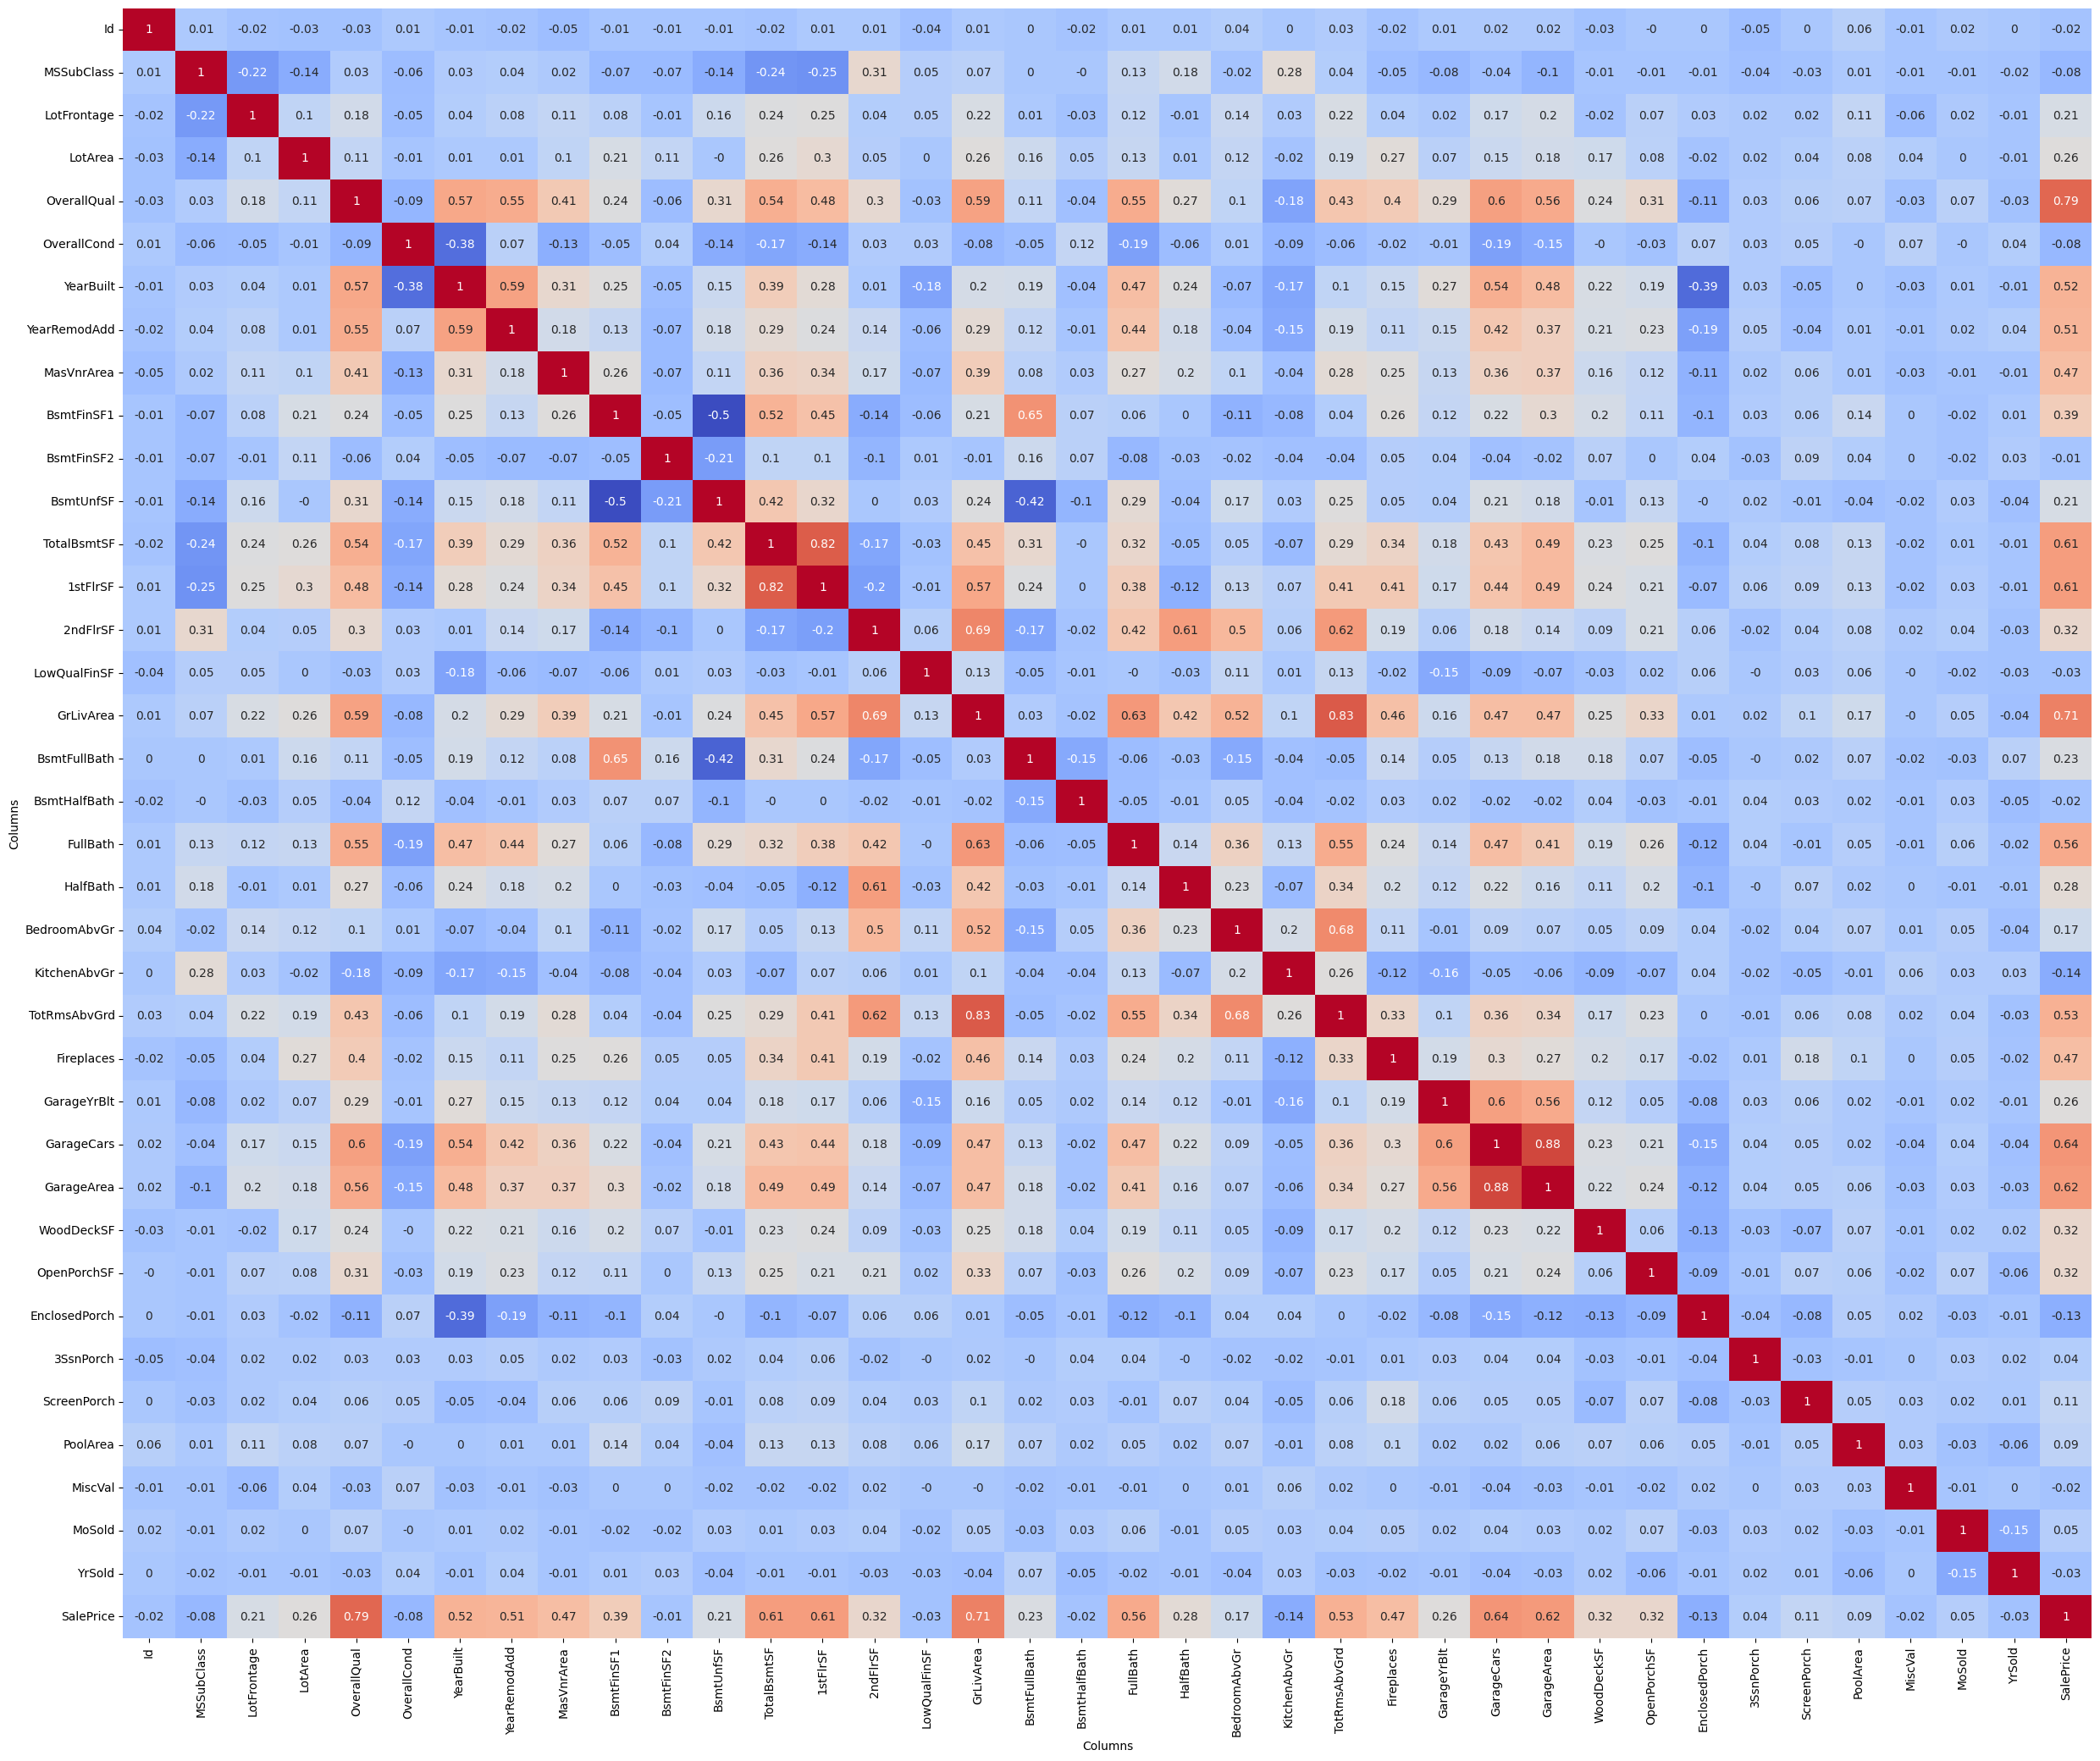

In [19]:
plt.figure(figsize=(30,25))
sns.heatmap(data=train[num_columns].corr().round(2), annot=True, cbar=False, cmap='coolwarm') 
plt.show()

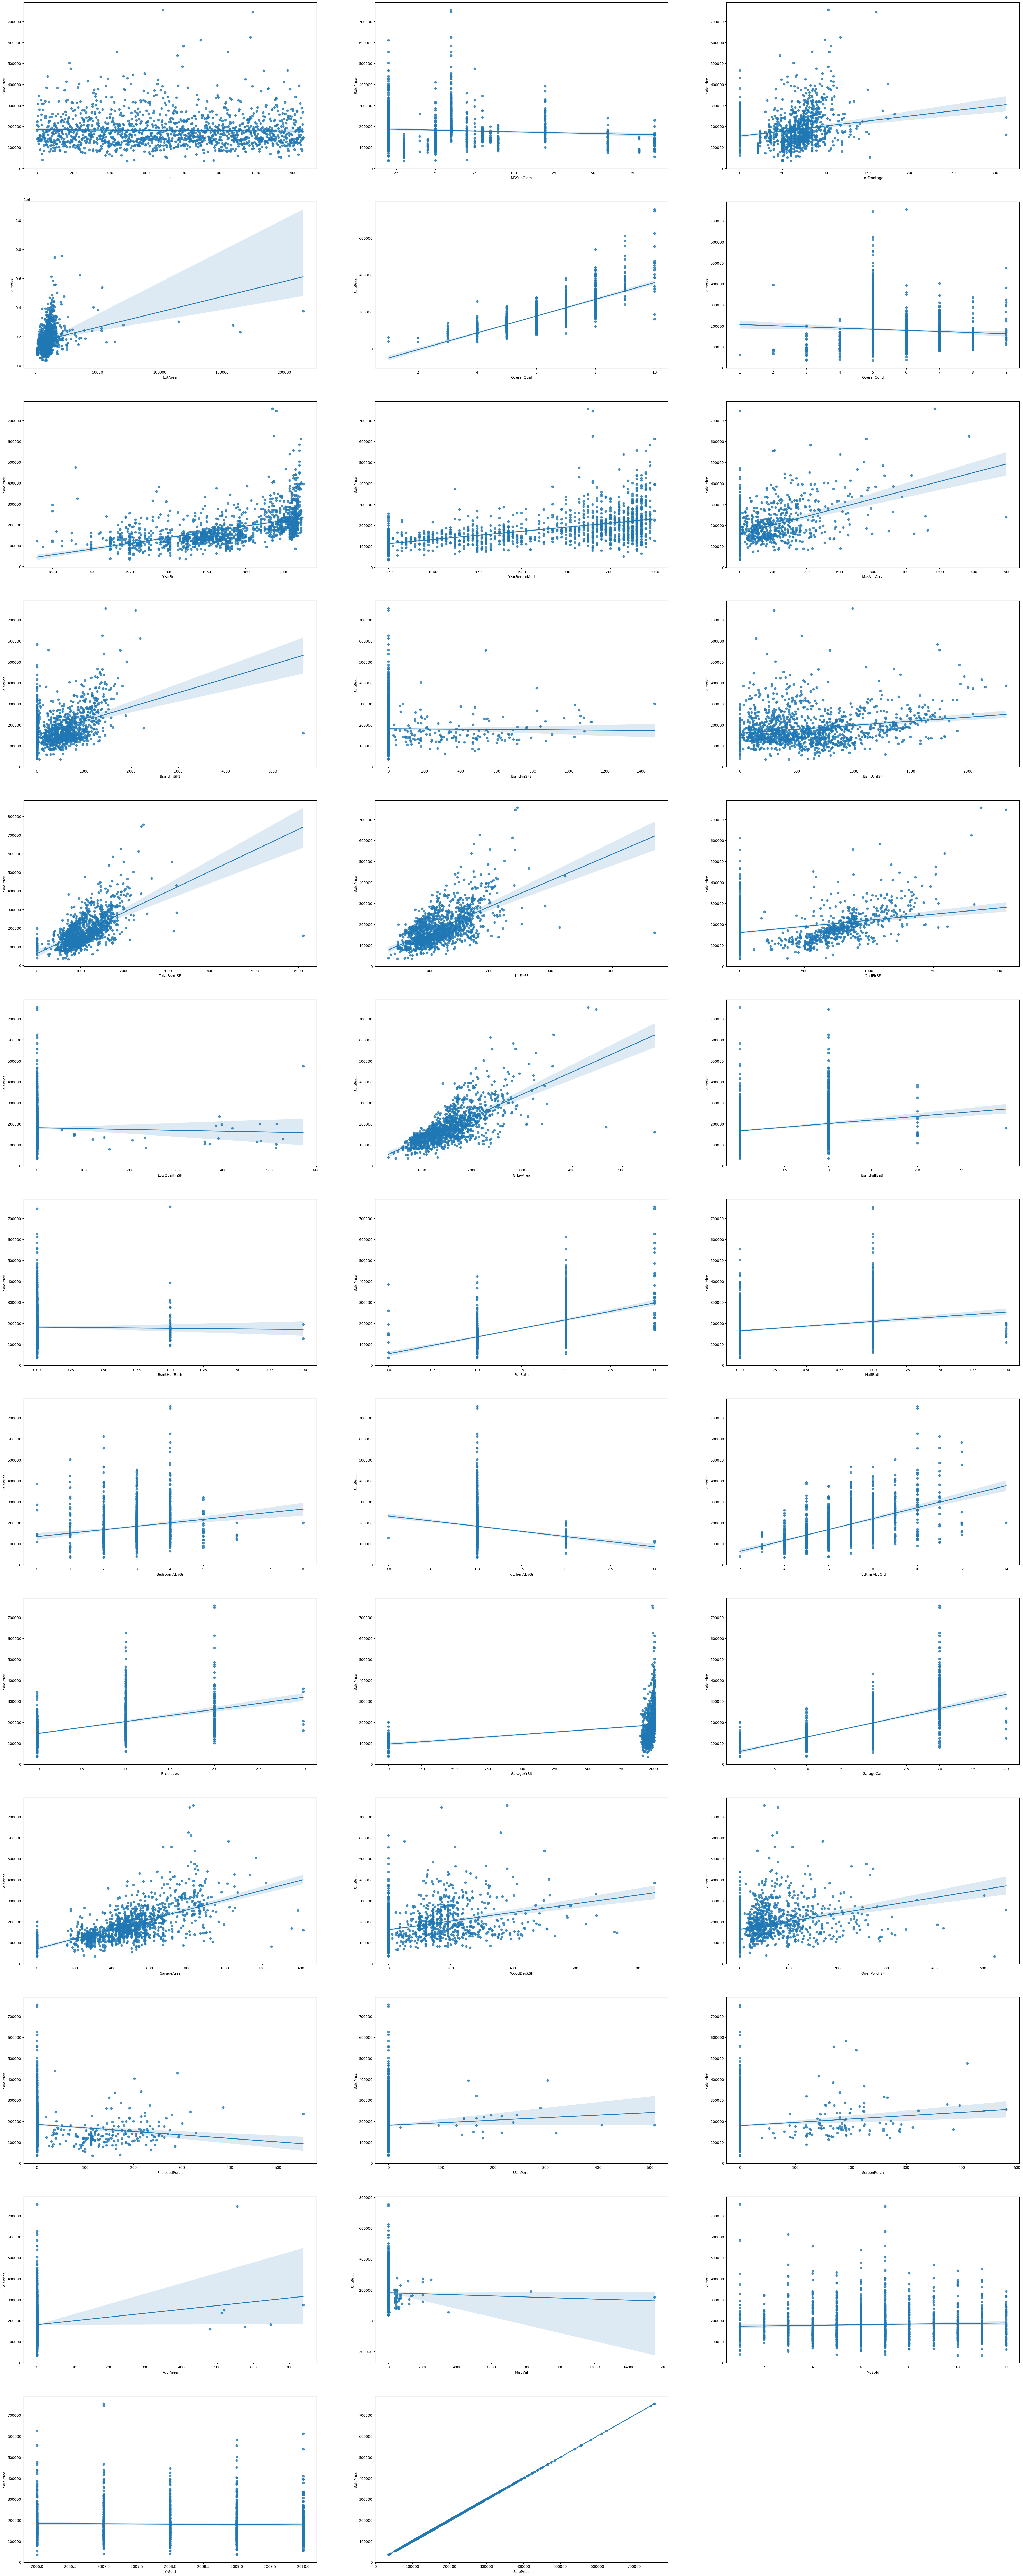

In [20]:
plt.figure(figsize = (50,200))
for i in enumerate(num_columns):
    plt.subplot(20,3, i[0] + 1)
    sns.regplot(data = train, x=i[1], y='SalePrice')

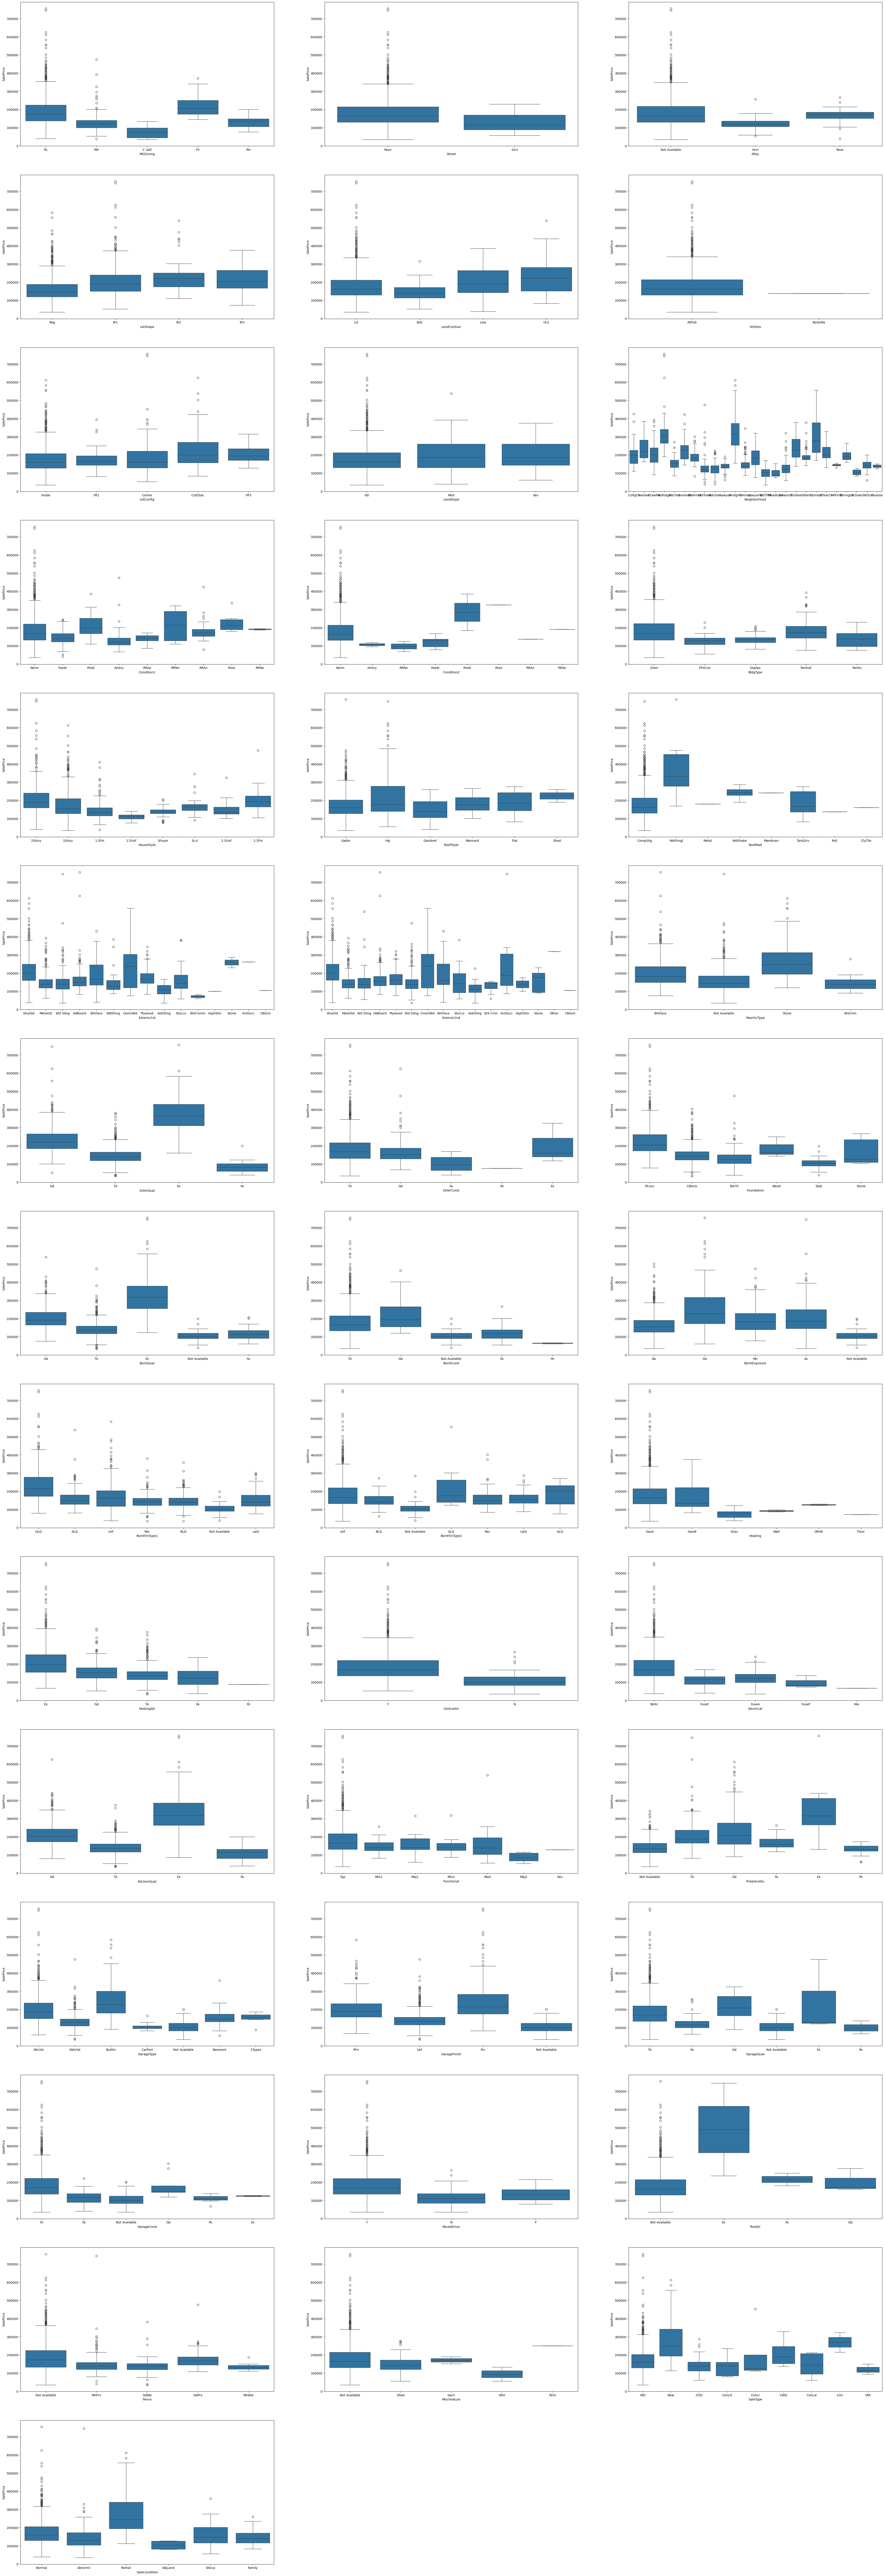

In [21]:
plt.figure(figsize = (50,200))
for i in enumerate(cat_columns):
    plt.subplot(20,3, i[0] + 1)
    sns.boxplot(data=train, x= i[1], y="SalePrice")

In [ ]:
#ML Learning Dataset Preparation

In [22]:
train.drop(columns = ['Id'], inplace=True)

In [23]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# fit the categorical data
encoder.fit(train[cat_columns])

# transform the cat columns
train[cat_columns] = encoder.transform(train[cat_columns])

In [24]:
X = train.copy().drop(columns = 'SalePrice')
y = train[['SalePrice']].copy()

# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,
                                    shuffle=True) 


print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (1095, 79)
y_train: (1095, 1)
X_test: (365, 79)
y_test: (365, 1)


In [25]:
scaler = StandardScaler()
 
# To scale data
scaler.fit(X)


# scale the val
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Machine Learning Implementation

In [26]:
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# get the score based on the test dataset
model_score = model.score(X_test, y_test)

# doing the prediction on the x, y test dataset
y_pred = model.predict(X_test)

# show the model mse score
mse = mean_squared_error(y_test, y_pred)


print(f'Model Score {model_score}')
print(f'Model MSE Score {mse}')

Model Score 0.858430574007694
Model MSE Score 989067383.0851576


In [ ]:
#Data Cleaning & Preparation

In [27]:
test_info = test.isna().sum().reset_index().rename(columns={0:'total missing'})
column_missing = list(test_info[test_info['total missing'] > 0]['index'])
# loop for each missing column, if it 'object' type then it will replace with 'Not Available', float is '0', while 'electrical' missing value will be replace by mode
for column in column_missing:
    if column == 'Electrical':
        #print('t')
        test[column] = test[column].fillna(test[column].mode()[0])
    elif test[column].dtype == 'object':
        test[column] = test[column].fillna('Not Available')
    else:
        test[column] = test[column].fillna(0)
# 2. drop the id column
test.drop(columns='Id', inplace=True)
# 3. convert all the categorical into numerical feature
test[cat_columns] = encoder.transform(test[cat_columns])
# 4. apply standardization
test = scaler.transform(test)

In [28]:
y_test_pred = model.predict(test)

In [ ]:
submission['SalePrice'] = y_test_pred
submission.to_csv('Submission.csv', index=False)